#        Wine Quality Prediction

# Running notebook instruction

I'm Yun Chi Chen with student ID 1719184, please download the csv file from the kaggle website: https://www.kaggle.com/rajyellow46/wine-quality
and please put the csv with this notebook in the same file.

## Introduction

Wine is a great drinking in the whole world, the experiment of a Portuguese "Vinho Verde" wine is collected in a dataset that includes many contents that appears in the wine. There are two types of wines, red and white, according to the International Organization of Vine and Wine, the average output of the wine every year is 260Mhl, that is 260 billion liter, and it is a very large number. The quality of wines will affect many aspects, the taste texture will change due to different percentage of contents, the quality of wine also influences the sales of both wines or what company will buy it. Lastly, I will like to find out the quality of wines referencing to the 11 contents contained in
the white and red wine. The input to our predictor is dataset contains many chemical contents in the wine. Then use linear regression, ridgeCV, lassoCV and logistic regression to output a predicted quality range.

## Related Work

There are a few similar researches of this topic since it is a dataset on Kaggle, as many prior researches uses all different kinds of models. They also analyze the differences of the red wine quality with white wine, which I am researching on both wines respectively, not comparing. Analyzing what the differences
between good and bad quality is also an important aspect. I have found three of the complete project that were also prediction wine quality. One project done by Nguyen [1], another is done by Dave [2], the other is done by Shin[3]. All projects have done data preparation beforehand more or less, but the one done by Nguyen have done the most data preparation. Although some plottings of figure presenting are not the same as mine, since the intial data was the same, the results of exploration did not differs a lot. The data preparation helps a lot to understand the initial data and know the relationship of the contents in the wine and the quality, positive or negative. 

All three projects were well-completed and have chosen to use the linear regression, Lasso, random forest, decision tree, Adaboost, XGBoost to be the model. In the modelling, I have also chosen the linear regression as the most basic one. In contrast, I wanted to find out whether multiple linear regression with ridge regression and lasso regression will bring a better result or not, thus I have tried to build ridgeCV and lassoCV models to compare. Another different model I have chosen is the logistic regression model, which I think is the clever approaches, since it gave a quite good result at the end and have a higher accuracy. One of the three project was done in R language and the other are in python. Although some score might not be super high, it still got a complete analysis and got the final result that is expected.

There are some limitations of the three project in general, but it is also the limitation that my project have faced. The initial dataset was unbalanced, since there are a majority of quality values with 5 and 6, this made the work of fining an optimal model much harder than first imagine. In order to fix this problem, a much larger dataset might be needed, a larger dataset might provide a more balanced data. Yet, this problem cannot be solved in most of the projects I have seen, since there are no similar dataset with a larger data now.

## Problem Formulation

### Data Inputting

The dataset was downloaded from the UCI Machine Learning Repository, and the dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality/winequalityN.csv


In [2]:
df = pd.read_csv('../input/wine-quality/winequalityN.csv')

In [3]:
#print out all the columns the dataframe have
print(*df.columns, sep='\n')

type
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [4]:
df.columns = ('type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality')

### Dataset Information

**For the input:**

Type: Two types of wines, red or white wine.

Fixed acidity: Fixed acids found in grapes 
Acids are one of the fundamental properties of wine and contribute greatly to the taste of the wine.

Volatile acidity: made from compounds in types of acid found in wine, and primarily constituted of acetic acid though other acids like lactic, formic and butyric acids might also be present. Too much volatile acids are undesirable and lead to unpleasant flavour.

Citric acid: One of the fixed acids that gives a wine its freshness.

Residual sugar: This typically refers to the natural sugar from grapes

Chlorides: Inorganic anionic halogen that is distributed exclusively within the extracellular fluid compartment and it is influenced by terrior

Free sulfur dioxide: Winemakers will always try to get the highest proportion of free sulphur to bind. They're also known as sulfites and excess of it gives a pungent odour.

Total sulfur dioxide: The sum total of free sulfur dioxide. This is mainly added to kill harmful bacteria and preserve quality and freshness. Too much of it can kill good yeast and give out undesirable odour.

Density: Comparison of the weight of a specific volume of wine to an equivalent volume of water. Generally used as a measure of the conversion of sugar to alcohol.

pH: Numeric scale to specify the acidity or basicity the wine. Fixed acidity contributes the most towards the pH of wines. pH Value less than 7 are acidic, greater than 7 are alkaline. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.

Sulphates: Mineral salts containing sulfur, and affects the wine aroma and flavour.

Alcohol: Volume of alcohol in wine and is usually measured in % vol or alcohol by volume (ABV).

**For the output:**

Quality: Grades of the wine quality between 0 (bad) and 10 (excellent). 

### Dataset Exploration

In [5]:
#Packages importing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import RidgeCV,LassoCV,LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, roc_auc_score,accuracy_score 
from sklearn.metrics import confusion_matrix as cm
from sklearn.svm import SVR
from scipy.stats import norm
from scipy.stats.mstats import winsorize
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

In [6]:
#first five rows
df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
#find missing value
Sum = df.isnull().sum()
Percentage = ( df.isnull().sum()/df.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
type,0,0.000000
fixed_acidity,10,0.001539
volatile_acidity,8,0.001231
citric_acid,3,0.000462
residual_sugar,2,0.000308
chlorides,2,0.000308
free_sulfur_dioxide,0,0.000000
total_sulfur_dioxide,0,0.000000
density,0,0.000000
pH,9,0.001385


In [7]:
#Replace missing value with mean
def null_cell(df): 
    total_missing_values = df.isnull().sum() 
    missing_values_per = df.isnull().sum()/df.isnull().count() 
    null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc']) 
    null_values = null_values.sort_values('total_null', ascending=False) 
    return null_values[null_values['total_null'] > 0] 
fill_list = (null_cell(df)).index
df_mean = df.copy()

for col in fill_list:
    df_mean.loc[:, col].fillna(df_mean.loc[:, col].mean(), inplace=True)

In [8]:
#Check all missing value are replaced and there are 0 missing value
df_mean.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

From here, all values are appropriate, where there are no missing valus and all values that are null are replaced by mean number.

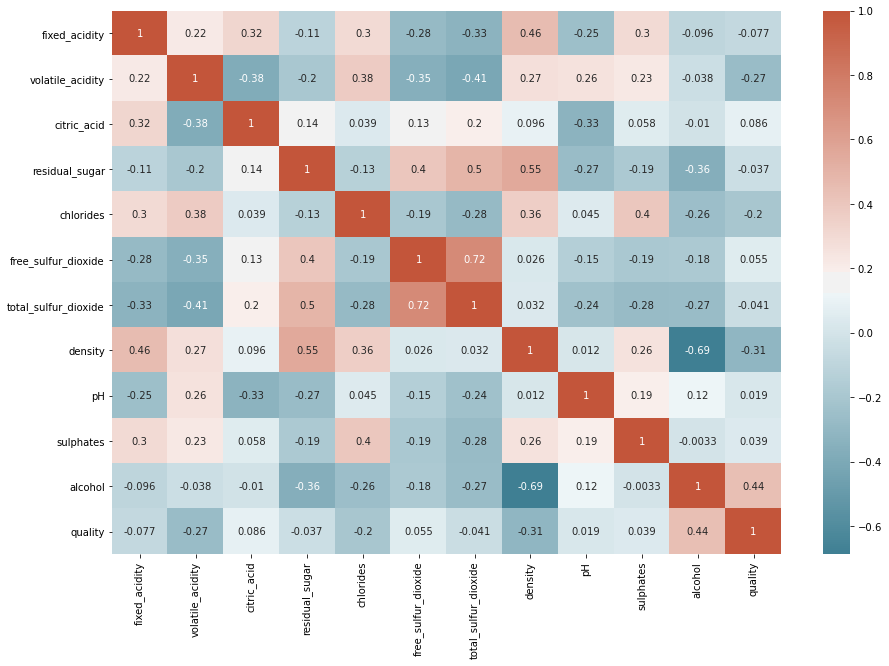

In [9]:
corr = df_mean.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Wine quality has the highest correlation with alcohol. Some other relation degrees are positive but very low with each other, such as citric acid, free sulfur dioxide, sulphates and pH value. There are also some low negative correlation with density, volatile acidity, chlorides, total sulfur dioxide and residual sugar.

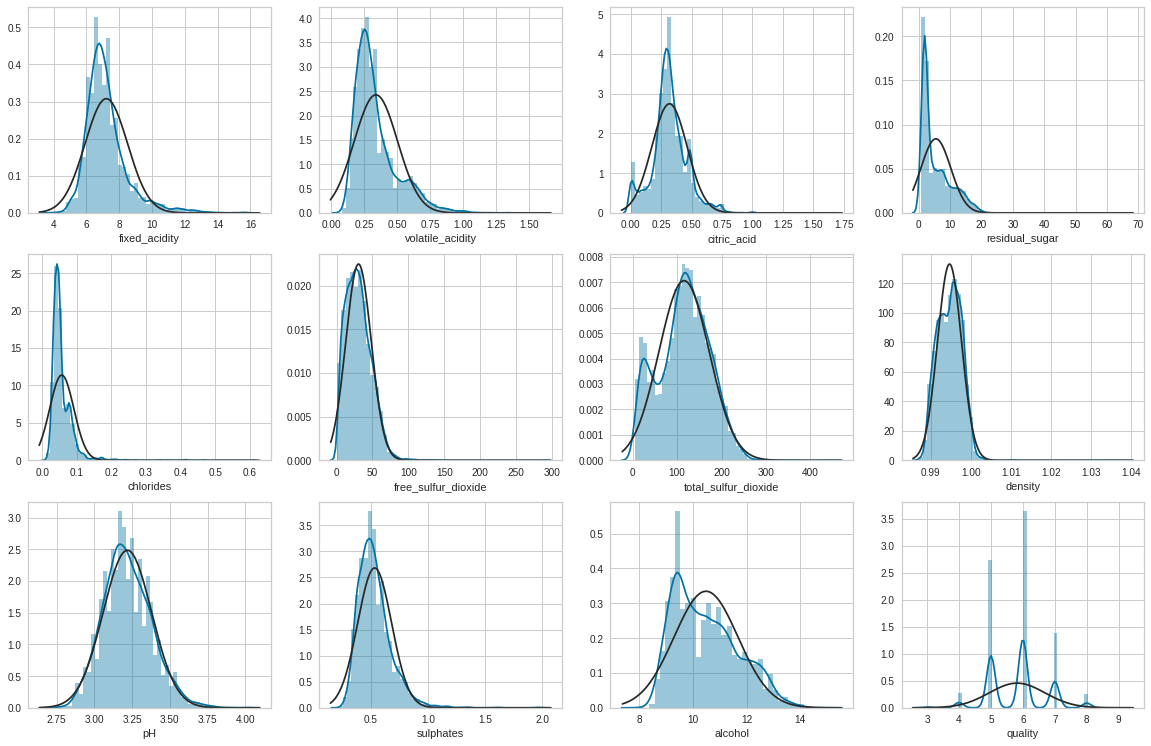

In [11]:
#Distribution of all Variables
plt.figure(figsize = (20,22))

for i in range(1,13):
    plt.subplot(5,4,i)
    sns.distplot(df_mean[df_mean.columns[i]], fit=norm)

The above all graphas are the distribution of all variables, it shows the probability density of each variable. All x labels is the variables' name and as you can see, there are all different density in parts.

### Data Preprocessing

In [10]:
#Create bins for 
df_bins= df_mean.copy()
bins = [0,5,10]


labels = [0, 1] # 'low'=0, 'high'=1
df_bins['quality_range']= pd.cut(x=df_bins['quality'], bins=bins, labels=labels)

print(df_bins[['quality_range','quality']].head(5))

df_bins = df_bins.drop('quality', axis=1) 

  quality_range  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6


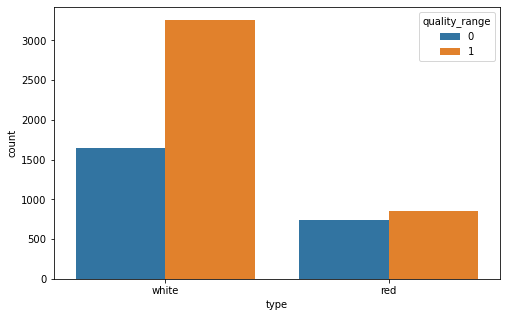

In [11]:
#Visualize the total count of each type of wine with quality bins range
plt.figure(figsize=(8,5))

sns.countplot(x = 'type', hue = 'quality_range', data = df_bins)
plt.show()
# 'low'=0, 'high'=1

According to the graph above, after putting the quality in range, and it become more simple. In the both wine, each counting of range and wine are shown above.

In [12]:
#Map the type from white and red to 0 and 1 respectively
df_bins.type = df_bins.type.map({'white':0, 'red':1})
df_bins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   type                  6497 non-null   int64   
 1   fixed_acidity         6497 non-null   float64 
 2   volatile_acidity      6497 non-null   float64 
 3   citric_acid           6497 non-null   float64 
 4   residual_sugar        6497 non-null   float64 
 5   chlorides             6497 non-null   float64 
 6   free_sulfur_dioxide   6497 non-null   float64 
 7   total_sulfur_dioxide  6497 non-null   float64 
 8   density               6497 non-null   float64 
 9   pH                    6497 non-null   float64 
 10  sulphates             6497 non-null   float64 
 11  alcohol               6497 non-null   float64 
 12  quality_range         6497 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 615.7 KB


PCA is important to represent a multivariate data table as smaller set of variables, in order to observe trends, jumps, clusters and outliers. Thus, PCA is done by the following cell.

In [13]:
pca = PCA(n_components=2)
pca.fit(df_bins)
print("Done PCA")

Done PCA


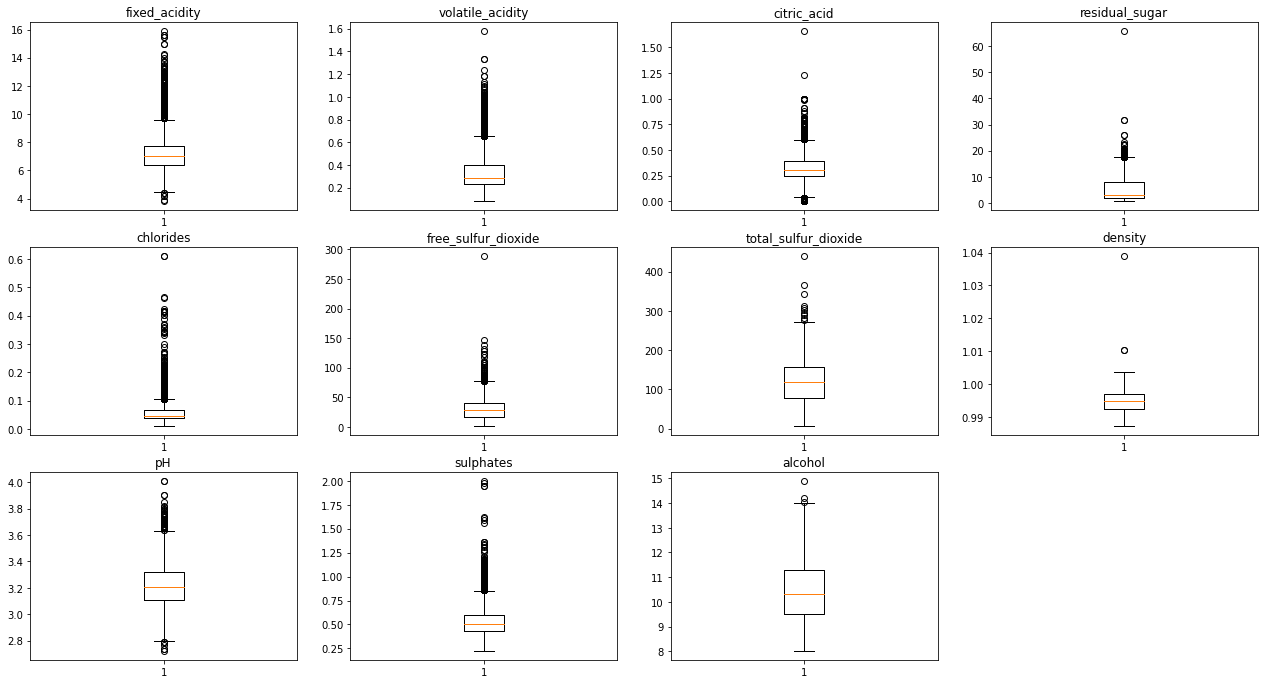

In [14]:
#Visualization of the outliers of each variable
outliers_by_12_variables = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
                            'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                            'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'] 
plt.figure(figsize=(22,20))

for i in range(0,11):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df_bins[outliers_by_12_variables[i]])
    plt.title(outliers_by_12_variables[i])

In [15]:
def winsor(x, multiplier=3): 
    upper= x.median() + x.std()*multiplier
    for limit in np.arange(0.001, 0.20, 0.001):
        if np.max(winsorize(x,(0,limit))) < upper:
            return limit
    return None


final_col = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
                            'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                            'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for i in range(1,len(final_col)):

    df_bins[final_col[i]] = winsorize(df_bins[final_col[i]], (0, winsor(df_bins[final_col[i]])))

In [16]:
df_bins.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality_range           0
dtype: int64

All data are checked again that there are no missing values. Since there are only one dataset, training dataset and testing dataset are split by the train test split with the test size 0.2 and random state 40. This will be done in the modelling.

## Methodology

All works now are done in Kaggle notebook with the environment python 3 and using the CSV file directly through the Kaggle Dataset. There are also many packages used from scikit-learn and basic useful package pandas, Path and numpy, which are all imported at the very beginning of the project. The CSV file was
read in from Kaggle and store in dataframe. The data exploration and preprocessing are done.

The models are built by Linear Regression, RidgeCV, LassoCV and logistic regression. 

In the linear regression, ridgeCV and LassoCV, all errors computing are done with mean squared error and score computing gives R^2 value, which means the amount of variability that is explained by my models and the sign of how is the quality of the models. 

1)Linear regression model is just the multiple linear model with the most ordinary least squares. Basically, it is a model that presumes a relationship between the input variables and the single output variable in a linear way. More specifically, output can be calculated from a linear combination of the input variables.

Mathematical Expression of most basic Linear Regression:

$$\hat{y}(W,X) = \sum\limits_{i=1}^{n}{W_i X_i} $$

where the W are the coefficients vector that minimize the residual sum of squares between the datasets that are observed and linear approximation prediction, and y hat is the predicted value. 

There are several ways to fix on the accuracy, two will be introduced and used, squared error and absolute error. The biggest difference of these two models is the penalty terms of each are not the same, the regression model using squared error adds the least squares of the coefficient. 

Mathematical Expression:

$${\min\limits_{w}}||X_w - y||_2^2 +  \alpha||w||_2^2$$

where 𝛼 is a user-defined hyperparameter, the larger value 𝛼 is, the stronger the collinearity coefficients are. This is also known as the Ridge regression model.

2)RidgeCV is a regression method based on L2 regularisation places a penalty on the size of the coefficients. It reduces the complexity by inducing a bias resulting in a lower variance and using RidgeCV finds an optimal alpha of the one hyperparameter for my model. 

The second model adds the absolute sum of the coefficients and has function as

$${\min\limits_{w}}\frac{1}{2n_{samples}}||X_w - y||_2^2 +  \alpha||w||_1$$


where $||w||_1$ is the $\ell_1$-norm of the vector. This is named as the Lasso model, which uses an $\ell_1$-norm of penalty to get solutions.

3)LassoCV is also a regression method but based on L1 regularisation and it places a penalty on the complexity not just by reducing the coefficient size but by reducing it to zero. Similar to Ridge regression, alpha is the hyperparameter. 

Another model is Logistic regresion is estimating the parameters of a logistic model, and it models the probability of certain class existing or not. In the logistic models in my project, the score computation are calculated by the accuracy score and f1-score, confusion matrix are also computed.

All methods are using the Python library of sklearn.linear_model, and I have learnt a lot from the website of scikit-learn organization. The other computation are also learnt on the website and using the packages from sklearn.metrics.

## Experiments and Results

**Linear Regression**

Firstly, I have done the multiple linear regression.

In [18]:
def linear_regression(X,y):
    print("=============LINEAR REGRESSION===============")
    mm=MinMaxScaler()
    yo=y.to_numpy()
    mm.fit(yo.reshape(-1,1))
    trans_y=mm.transform(yo.reshape(-1,1))
    X_train, X_test, y_train, y_test = train_test_split(X, trans_y, test_size=0.2, random_state=40)
    lin_reg= LinearRegression().fit(X_train,y_train)
    print("R^2 value Score: ",lin_reg.score(X_train,y_train))

    a=lin_reg.predict(X_train)
    train_rmse= (mean_squared_error(a,y_train)) ** 0.5
    print("train RMSE: ", train_rmse)
    b=lin_reg.predict(X_test)
    test_rmse= (mean_squared_error(b,y_test)) ** 0.5
    print("test RMSE:", test_rmse)
    print("Coeffient: ")
    print(lin_reg.coef_)    
    return b

# 'low'=0, 'high'=1
X = df_bins[['fixed_acidity', 'volatile_acidity', 'citric_acid',
                            'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                            'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']] 
y = df_mean.quality
pred = linear_regression(X,y)
#plt.figure(figsize=(8,5))
#plt.hist(pred)
#plt.title("quality range Count")
#plt.xlabel('quality range')
#plt.ylabel('count')
#plt.show()

=============LINEAR REGRESSION===============
R^2 value Score:  0.29757961995289417
train RMSE:  0.12153447382310968
test RMSE: 0.12507020646779235
Coeffient: 
[[ 1.02897720e-02 -2.19474573e-01 -2.01759568e-02  7.95672149e-03
   1.73755929e-04  1.32413888e-03 -4.54164262e-04 -1.09177933e+01
   7.37885875e-02  1.63011530e-01  4.22386160e-02]]


As you can see, all hyperparameters in this regression are set to defualt, which is copy_X=True, fit_intercept=True, n_jobs=1, normalize=False, since it is the most basic one. I have scaled the quality by the MinMaxScaler into the range of 0 and 1, thus, the final prediction will be in range of 0 and 1 intead of 0 and 10. The score seems very low in this model. The root mean squared error of training dataset and testing dataset are also calculated and got both a similar to 0.12, which means that it has no worries of overfitting but it also indicates that ridge and lasso regression model might not provide a better result. 

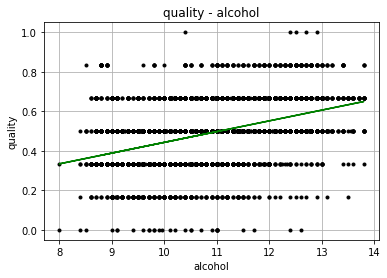

In [19]:
mm=MinMaxScaler()
yo=df_mean.quality.to_numpy()
mm.fit(yo.reshape(-1,1))
trans_y=mm.transform(yo.reshape(-1,1))
  
m1 = LinearRegression()
XP = df_bins.alcohol.values.reshape(-1,1)
m1.fit(XP,trans_y)
plt.figure()
plt.title("quality - alcohol")
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.plot(XP,trans_y,"k.")
plt.plot(XP,m1.predict(XP),'g')
plt.grid(True)
plt.show()

From the data exploration, I founded that alcohol has the highest relationship with quality, thus, I have plot the alcohol feature with the quality and prediction together. Although it seems not very related, it definitely shows some links to the prediction, since the quality initially have to be integer the gap between is large and cannot be changed. From this graph, it also inhance that alcohol has the positive correlation with quality.

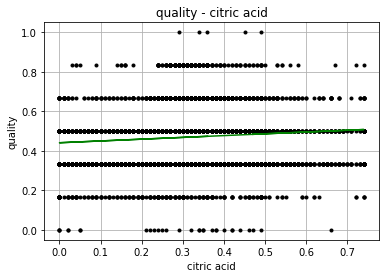

In [20]:
m1 = LinearRegression()
XP = df_bins.citric_acid.values.reshape(-1,1) 
m1.fit(XP,trans_y)
plt.figure()
plt.title("quality - citric acid")
plt.xlabel("citric acid")
plt.ylabel("quality")
plt.plot(XP,trans_y,"k.")
plt.plot(XP,m1.predict(XP),'g')
plt.grid(True)
plt.show()


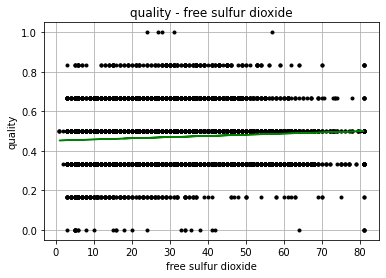

In [21]:
m1 = LinearRegression()
XP = df_bins.free_sulfur_dioxide.values.reshape(-1,1) 
m1.fit(XP,trans_y)
plt.figure()
plt.title("quality - free sulfur dioxide")
plt.xlabel("free sulfur dioxide")
plt.ylabel("quality")
plt.plot(XP,trans_y,"k.")
plt.plot(XP,m1.predict(XP),'g')
plt.grid(True)
plt.show()

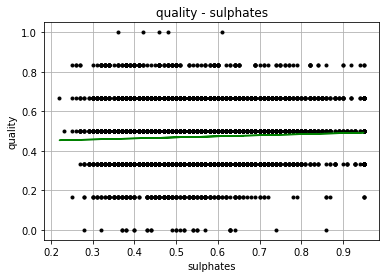

In [22]:
m1 = LinearRegression()
XP = df_bins.sulphates.values.reshape(-1,1) 
m1.fit(XP,trans_y)
plt.figure()
plt.title("quality - sulphates")
plt.xlabel("sulphates")
plt.ylabel("quality")
plt.plot(XP,trans_y,"k.")
plt.plot(XP,m1.predict(XP),'g')
plt.grid(True)
plt.show()

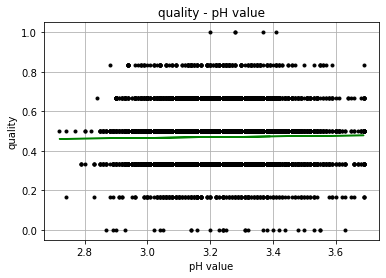

In [24]:
m1 = LinearRegression()
XP = df_bins.pH.values.reshape(-1,1) 
m1.fit(XP,trans_y)
plt.figure()
plt.title("quality - pH value")
plt.xlabel("pH value")
plt.ylabel("quality")
plt.plot(XP,trans_y,"k.")
plt.plot(XP,m1.predict(XP),'g')
plt.grid(True)
plt.show()

From the four graphs above are the positive correlation with the quality and the prediction lines are almost a horizontal line since they are positive but low relationship with quality.  

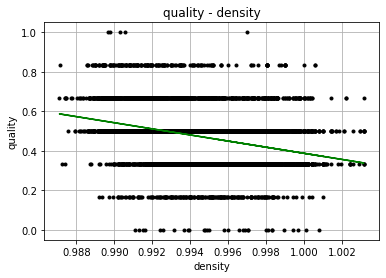

In [25]:
m1 = LinearRegression()
XP = df_bins.density.values.reshape(-1,1) 
m1.fit(XP,trans_y)
plt.figure()
plt.title("quality - density")
plt.xlabel("density")
plt.ylabel("quality")
plt.plot(XP,trans_y,"k.")
plt.plot(XP,m1.predict(XP),'g')
plt.grid(True)
plt.show()

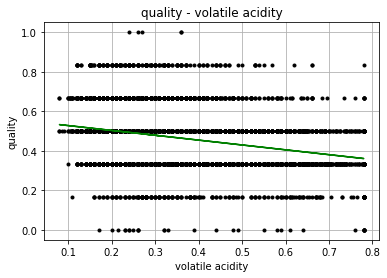

In [26]:
m1 = LinearRegression()
XP = df_bins.volatile_acidity.values.reshape(-1,1) 
m1.fit(XP,trans_y)
plt.figure()
plt.title("quality - volatile acidity")
plt.xlabel("volatile acidity")
plt.ylabel("quality")
plt.plot(XP,trans_y,"k.")
plt.plot(XP,m1.predict(XP),'g')
plt.grid(True)
plt.show()

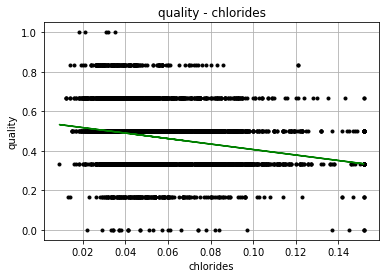

In [27]:
m1 = LinearRegression()
XP = df_bins.chlorides.values.reshape(-1,1) 
m1.fit(XP,trans_y)
plt.figure()
plt.title("quality - chlorides")
plt.xlabel("chlorides")
plt.ylabel("quality")
plt.plot(XP,trans_y,"k.")
plt.plot(XP,m1.predict(XP),'g')
plt.grid(True)
plt.show()

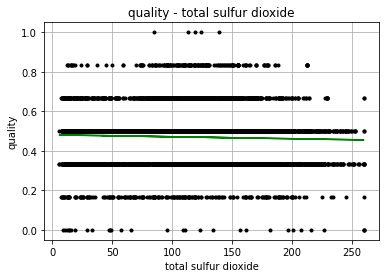

In [28]:
m1 = LinearRegression()
XP = df_bins.total_sulfur_dioxide.values.reshape(-1,1) 
m1.fit(XP,trans_y)
plt.figure()
plt.title("quality - total sulfur dioxide")
plt.xlabel("total sulfur dioxide")
plt.ylabel("quality")
plt.plot(XP,trans_y,"k.")
plt.plot(XP,m1.predict(XP),'g')
plt.grid(True)
plt.show() 

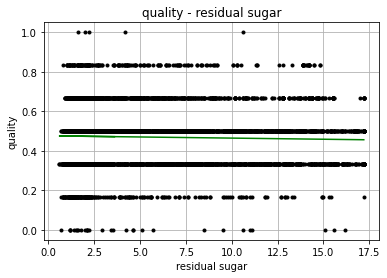

In [30]:
m1 = LinearRegression()
XP = df_bins.residual_sugar.values.reshape(-1,1) 
m1.fit(XP,trans_y)
plt.figure()
plt.title("quality - residual sugar")
plt.xlabel("residual sugar")
plt.ylabel("quality")
plt.plot(XP,trans_y,"k.")
plt.plot(XP,m1.predict(XP),'g')
plt.grid(True)
plt.show()

From the five graphs above are the variables that have negative correlation with the quality, density and chlorides have the steepest prediction line and total sulfur dioxide and residual sugar have the nearly horizontal prediction line. From all the graphs in linear regression, I found that the prediction lines are mostly around 0.4 to 0.6 in the graph, which is the 5 or 6 in the initial data. Yet, there are still multiple quality lies under 0.4 or above 0.6, which makes the prediction less accuracy and have a low score on the model.

**RidgeCV**

I want to find out whether ridge regression model will improve and have better score or just as the I have assumed before it will not change too much, thus I have used the ridgeCV model to find out next.


In [31]:
def ridgeCV_regression(X,y):
    alpha= np.arange(0.01,10,0.1).tolist()
    mm=MinMaxScaler()
    yo=y.to_numpy()
    mm.fit(yo.reshape(-1,1))
    trans_y=mm.transform(yo.reshape(-1,1))
    X_train, X_test, y_train, y_test = train_test_split(X, trans_y, test_size=0.2, random_state=40)
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
    ridge_reg = RidgeCV(alphas=alpha)
    ridge_reg.fit(X_train, y_train)
    test_pred=ridge_reg.predict(X_test)
    #print(test_pred.mean())
    
    score=ridge_reg.score(X_train, y_train)
    print("R^2 value Score: ", score)
    
    train_pred=ridge_reg.predict(X_train)
    train_rmse= (mean_squared_error(train_pred,y_train)) ** 0.5
    print("train_rmse = ", train_rmse)
    
    test_rmse= (mean_squared_error(test_pred,y_test)) ** 0.5
    print("test_rmse = ", test_rmse)
    print("Coeffient: ")
    print(ridge_reg.coef_)
    
X = df_bins[['type', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
       'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH']] 
y = df_mean.quality
ridgeCV_regression(X,y)

R^2 value Score:  0.2984746069812718
train_rmse =  0.12145702273358372
test_rmse =  0.12529611997384285
Coeffient: 
[[ 3.74705496e-02  5.17755125e-02 -3.21341412e+00 -2.64509639e-01
  -2.28064827e-01 -1.68169398e-02 -1.60953621e-04  1.22755322e-03
  -3.03729965e-04  1.27746558e-01  5.11715837e-03  2.12633534e-02]]


In ridgeCV, it performs Leave-One-Out Cross-Validation, which is a form of efficient Leave-One-Out cross-validation by default, I have tried to use more number of folds to see whether a better score or lower train and test error will shown or not. However, no matter how I have tried, it seems that it stays the same as the default, and in this model I have tried to use the model to find an optimal alpha and the score and mean squared error of both training and testing are in the result above. As you can see, there are no big difference with the linear regression and fits the assumption I have made before.

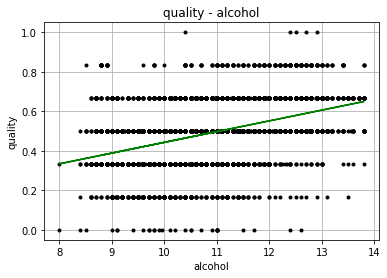

In [32]:
alpha= np.arange(0.01,10,0.1).tolist()
m2 = RidgeCV(alphas=alpha)
XP = df_bins.alcohol.values.reshape(-1,1)
m2.fit(XP,trans_y)
plt.figure()
plt.title("quality - alcohol")
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.plot(XP,trans_y,"k.")
plt.plot(XP,m2.predict(XP),'g')
plt.grid(True)
plt.show()

Since it mostly have the same result with linear regression, I have only plotted the relationship between quality and alcohol, which has the highest correlation with quality. As you can see, there is a positive relationship between the two features andit has not been too different with the linear regression figure.

**LassoCV**

Next is the LassoCV model that is a lot the same as ridge, but using a different regularization.

In [22]:
def lassoCV_regression(X,y):
    alpha= np.arange(0.01,10,0.1).tolist()
    mm=MinMaxScaler()
    yo=y.to_numpy()
    mm.fit(yo.reshape(-1,1))
    trans_y=mm.transform(yo.reshape(-1,1))
    X_train, X_test, y_train, y_test = train_test_split(X, trans_y, test_size=0.2, random_state=40)
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
    lasso_reg = LassoCV(alphas=alpha)
    lasso_reg.fit(X_train, y_train)
    test_pred=lasso_reg.predict(X_test)
    #print(test_pred.mean())
    
    score=lasso_reg.score(X_train, y_train)
    print("R^2 =", score)
    print(lasso_reg.score(X_test,y_test))
    
    train_pred=lasso_reg.predict(X_train)
    train_rmse= (mean_squared_error(train_pred,y_train)) ** 0.5
    print("train_rmse = ", train_rmse)
    
    test_rmse= (mean_squared_error(test_pred,y_test)) ** 0.5
    print("test_rmse = ", test_rmse)
    print("Coeffient: ")
    print(lasso_reg.coef_)
X = df_bins[['type', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
       'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH']] 
y = df_mean.quality
lassoCV_regression(X,y)

R^2 = 0.22987501917280428
0.215375162111764
train_rmse =  0.12725695836113357
test_rmse =  0.13068794100535888
Coeffient: 
[-0.          0.0512358  -0.         -0.         -0.          0.
 -0.          0.00163282 -0.00024307  0.          0.00225161  0.        ]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In LassoCV, it performs Lasso linear model with iterative fitting along a regularization path, and by default, it uses 5-fold cross-validation. I have tried to use other number of folds to see whether the score, train and test error will change or not. However, it seems to stay the same as the 5-fold no matter how I have tried. Since the model complexity is not high the prediction is not going to be any better than linear regression. Similar to Ridge regression, alpha is the hyperparameter. As you can see, there are no big difference with the linear regression and the ridgeCV and it also fits the hypothesis I have made previously.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


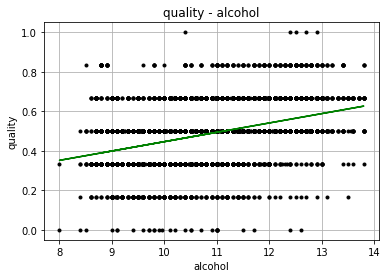

In [33]:
alpha= np.arange(0.01,10,0.1).tolist()
m3 = LassoCV(alphas=alpha)
XP = df_bins.alcohol.values.reshape(-1,1)
m3.fit(XP,trans_y)
plt.figure()
plt.title("quality - alcohol")
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.plot(XP,trans_y,"k.")
plt.plot(XP,m3.predict(XP),'g')
plt.grid(True)
plt.show()

Similarly to RidgeCV, I have only plotted the relationship between quality and alcohol, which has the highest correlation with quality. As you can see, there is a positive relationship between the two features andit has not been too different with the linear regression figure.

From here, I have finished the section of the regression model and found that three models are basically the same. RidgeCV and LassoCV are more complex than linear regression but has mostly similar result with linear regression, this can indicate that more complex models do not necessarily mean better models and models should be selected based on our knowledge.

**Logistic Regression**

Next is the logistic regression model part, with a bins to classify the quality into different labels. Firstly, to put the quality into 0 and 1 two labels, with 0 is bad and 1 is good.

One-vs-rest
-----------------------------------
Accuracy in Training   : 0.75
Accuracy in Testing   : 0.73
Error Rate:  0.2661538461538462
F1_score     :  0.7338461538461538


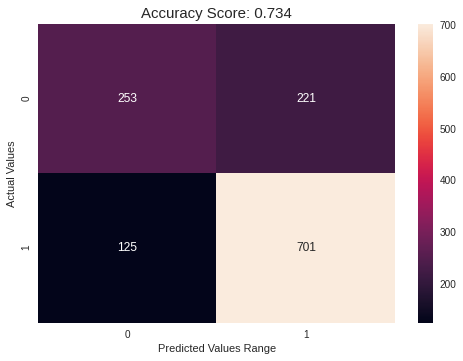

In [23]:
def logistic_regression(X,y):

    scaled_x=preprocessing.minmax_scale(X)
    X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=40)
    log_reg = LogisticRegression(max_iter=300,random_state=40, multi_class='ovr')
    log_reg.fit(X_train, y_train)
    train_accuracy = log_reg.score(X_train, y_train)
    test_accuracy = log_reg.score(X_test, y_test)
    print('One-vs-rest', '-'*35, 
          'Accuracy in Training   : {:.2f}'.format(train_accuracy), 
          'Accuracy in Testing   : {:.2f}'.format(test_accuracy), sep='\n')
    
    test_pred=log_reg.predict(X_test)
    Error_Rate = 1- (accuracy_score(y_test, test_pred))  
    print("Error Rate: ", Error_Rate)

    precision_s = precision_score(y_test, test_pred,average='micro')
    recall_s    = recall_score(y_test, test_pred, average='micro')
    #print("F1_score     : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))
    print("F1_score     : ",  f1_score(y_test, test_pred,average='micro'))
    
    score = round(accuracy_score(y_test, test_pred), 3)
    cm1 = cm(y_test, test_pred)
    sns.heatmap(cm1, annot=True, fmt=".0f")
    plt.xlabel('Predicted Values Range')
    plt.ylabel('Actual Values')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    plt.show()
X = df_bins[['type', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
       'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH']] 
y = df_bins.quality_range
logistic_regression(X,y)

In Logistic Regression, the quality have been set to two range, and the hyperparameters are setted from default to max_iter=300, random_state=40, multi_class='ovr', and others are all with default. The reason that maximum number of iteration is so high is that it would cause a warning message, thus, it have been set to as high as it would not show the warning message. With a random state of 40, it provides the best score of all, and the multi class have been setted to 'ovr', which is one-vs-rest scheme.

The accuracy score of both training and testing demonstrates how accurate the model is and the error rate is also calculated. F1-score is another kind of measure that measures the accuracy of the model. It is calculated from the precision score and recall score of the test, where the precision is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive. Basically, F1-score is the harmonic mean of Precision and Recall =2*(( Recall * Precision) / (Recall + Precision)) 

The graph is a heat map of the Confusion Matrix in Chart, and it computes the confusion matrix to evaluate the accuracy of a model. The accuracy score is on the top and it shows the relationship between predicted values range and the actual values.

**Logistic With 3 Bins**

From the above, I have found Logistic Regression is a much more better models than any of the regressions model. Thus, I have decided to try to enhance the model with divided the quality range into 3 labels instead of only 2. Generally, it is similar with the previous dividing to 2 labels, where the three labels represents bad, average ok and good respectively and initially [0-10] is divided to 3 parts with [0-4], [4-7] and [7-10].

In [24]:
df_3bins= df_mean.copy()
df_3bins.type = df_3bins.type.map({'white':0, 'red':1})
bins = [0,4,7,10]

labels = [0,1,2] # 'low'=0,'average'=1, 'high'=2

df_3bins['quality_range']= pd.cut(x=df_3bins['quality'], bins=bins, labels=labels)

#df_bins3.type = df_bins3.type.map({'white':0, 'red':1})

print(df_3bins[['quality_range','quality']].head(5))

  quality_range  quality
0             1        6
1             1        6
2             1        6
3             1        6
4             1        6


So, again, the Logistic Regression with the 3 bins model.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


One-vs-rest
-----------------------------------
Accuracy Score of Training : 0.93
Accuracy Score of Testing  : 0.93
Error Rate:  0.06846153846153846
F1_score     :  0.9315384615384615


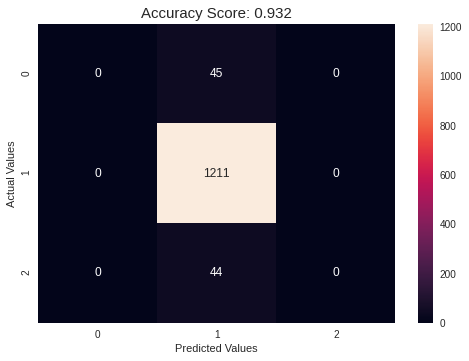

In [25]:
def log3_reg(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)
    log_reg_3 = LogisticRegression(max_iter=300,random_state=40)
    log_reg_3.fit(X_train, y_train)
    train_accuracy = log_reg_3.score(X_train, y_train)
    test_accuracy = log_reg_3.score(X_test, y_test)
    print('One-vs-rest', '-'*35, 
          'Accuracy Score of Training : {:.2f}'.format(train_accuracy), 
          'Accuracy Score of Testing  : {:.2f}'.format(test_accuracy), sep='\n')
  
    test_pred = log_reg_3.predict(X_test)
    Error_Rate = 1- (accuracy_score(y_test, test_pred))  
    print("Error Rate: ",Error_Rate)
    
    precision_s = precision_score(y_test, test_pred,average='micro')
    recall_s    = recall_score(y_test, test_pred, average='micro')
    #print("F1_score     : ",  2*((precision_s*recall_s)/(precision_s + recall_s)))
    print("F1_score     : ",  f1_score(y_test, test_pred,average='micro'))
    
    
    score = round(accuracy_score(y_test, test_pred), 3)
    cm1 = cm(y_test, test_pred)
    sns.heatmap(cm1, annot=True, fmt=".0f")
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    plt.show()
X3 = df_3bins[['type', 'alcohol', 'density', 'volatile_acidity', 'chlorides',
       'citric_acid', 'fixed_acidity', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH']]
y3 = df_3bins.quality_range
log3_reg(X3,y3)

In this model, it is mostly the same as the previous one, but predicting into 3 labels, 0, 1 and 2. As you can see from the  result, the final accuracy score of both training and testing are 0.93, which have been highly improve from the model with only 2 labels. The error rate is 0.06 and the F1-score is 0.93, which is also calculate by the precision score and recall score.

The heat map is also the confusion matrix chart of the 3 bins model. As you can see, there are a lot less error value and the accuracy score is on the top, 0.93 which is very high and indicates that this is a appropriate model.

## Conclusion

In conclusion, 5 kinds of model are done for the prediction, linear regression, ridgeCV, lassoCV, logistic regression with 2 bins and logistic regression with 3 bins. The highest performing model is the logistic regression with 3 bins, which have an accuracy score of 0.93. From this project, it is shown that classification models might have a better result than regression models, since that linear regression, ridgeCV, and lassoCV have low error score already but the accuracy is hard to improve. In the regression model part, it is also prove that more complex models will not really helps to enhance the accuracy and all three of them shown almost the same result. In the classification models, logistic regression with 2 bins have a great score of 0.73 and has been improved to 0.93 with 3 bins of quality range.

**Future Work**

If I had more time to work on this project, I would have tried to do more models to compare the result with the models I have now. One model I will try is the Supported Vector Classification to see whether it can perform as well as logistic regression. Another is the TensorFlow and Keras, it provides the neural network solving problem, and it is totally different model of the models I have now. It might have a different perspective of the prediction and may probable give a better model. Also, If there is a possibility of a larger dataset to be the initial one, it will help a lot of balancing the dataset and have a contribution to predict the quality values.

## Reference

[1] D. Nguyen, "Red Wine Quality Prediction Using Regression Modeling and Machine Learning", Available: https://towardsdatascience.com/red-wine-quality-prediction-using-regression-modeling-and-machine-learning-7a3e2c3e1f46, (2020).

[2] A. Dave, "Regression from scratch — Wine quality prediction", Available: https://medium.com/datadriveninvestor/regression-from-scratch-wine-quality-prediction-d61195cb91c8, (2019).

[3] T. Shin, "Predicting Wine Quality with Several Classification Techniques", Available: https://towardsdatascience.com/predicting-wine-quality-with-several-classification-techniques-179038ea6434, (2020)